In [185]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
import joblib
import os


PART 1: Dataloading

In [186]:
df = pd.read_csv("dataset/heart_disease_dataset_CHUD_S_A.csv")

In [187]:
print("Total samples:", len(df))

Total samples: 5000


In [188]:
print("Total features:", df.shape[1])

Total features: 14


In [189]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,heart_disease
0,38.871687,Male,Typical Angina,100.490248,163.166661,NaN,LV hypertrophy,183.658119,No,0.114644,Upsloping,0.0,Normal,no disease
1,60.625755,Male,Asymptomatic,NaN,338.711395,True,LV hypertrophy,141.161921,NaN,2.361526,Downsloping,2.0,NaN,severe
2,64.306898,Male,NaN,146.355656,337.004035,True,LV hypertrophy,NaN,Yes,2.660477,Downsloping,2.0,Reversible defect,severe
3,57.457313,Female,Non-Anginal Pain,NaN,260.116075,True,NaN,150.353969,Yes,1.145959,Flat,1.0,Reversible defect,mild
4,53.394739,Male,Non-Anginal Pain,129.763455,224.948879,False,LV hypertrophy,147.834030,Yes,NaN,Flat,NaN,Reversible defect,mild


In [190]:
print("Total missing values:", df.isnull().sum().sum())

Total missing values: 7660


PART 2: BASIC STATISTICS AND CALCULATIONS

In [191]:
df.shape[0]

5000

In [192]:
df.shape[1] - 1

13

In [193]:
df.dtypes.iloc[:-1]

age         float64
sex          object
cp           object
trestbps    float64
chol        float64
fbs          object
restecg      object
thalach     float64
exang        object
oldpeak     float64
slope        object
ca          float64
thal         object
dtype: object

In [194]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            4411 non-null   float64
 1   sex            4418 non-null   object 
 2   cp             4409 non-null   object 
 3   trestbps       4399 non-null   float64
 4   chol           4425 non-null   float64
 5   fbs            4421 non-null   object 
 6   restecg        4417 non-null   object 
 7   thalach        4416 non-null   float64
 8   exang          4405 non-null   object 
 9   oldpeak        4407 non-null   float64
 10  slope          4402 non-null   object 
 11  ca             4411 non-null   float64
 12  thal           4399 non-null   object 
 13  heart_disease  5000 non-null   object 
dtypes: float64(6), object(8)
memory usage: 547.0+ KB


In [195]:
df.describe()

,age,trestbps,chol,thalach,oldpeak,ca
count,4411.000000,4399.000000,4425.000000,4416.000000,4407.000000,4411.000000
mean,54.829901,133.019682,262.883223,150.289463,1.778127,1.378372
std,10.855032,19.913154,80.613567,22.141853,1.581597,1.022590
min,29.000000,94.000000,126.000000,101.383435,0.000000,0.000000
25%,46.027138,116.479869,188.967414,131.642083,0.485799,1.000000
50%,54.822873,134.500404,259.801646,149.953070,1.191017,1.000000
75%,63.539473,148.299363,327.875962,169.124221,2.626216,2.000000
max,77.000000,176.782096,423.482009,195.551682,5.165494,3.000000


In [196]:
target = df.columns[-1]
df[target].value_counts()

heart_disease
no disease          1030
mild                1028
immediate danger     994
severe               974
very mild            974
Name: count, dtype: int64

In [197]:
(df[target].value_counts(normalize=True) * 100)

heart_disease
no disease          20.60
mild                20.56
immediate danger    19.88
severe              19.48
very mild           19.48
Name: proportion, dtype: float64

In [198]:
largest = class_counts.max()
smallest = class_counts.min()
imbalance_ratio = largest / smallest
print("\nLargest class size:", largest)
print("Smallest class size:", smallest)
print("Imbalance ratio (largest/smallest):", round(imbalance_ratio, 2))



Largest class size: 1030
Smallest class size: 974
Imbalance ratio (largest/smallest): 1.06


VISUALIZATION

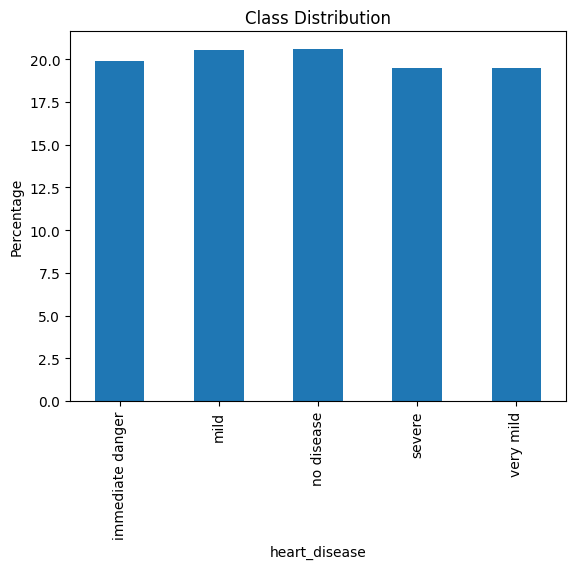

In [199]:
class_percent = df[target].value_counts(normalize=True) * 100
plt.figure()
class_percent.sort_index().plot(kind="bar")
plt.ylabel("Percentage")
plt.title("Class Distribution")
plt.savefig("class_distribution.png")
plt.show()

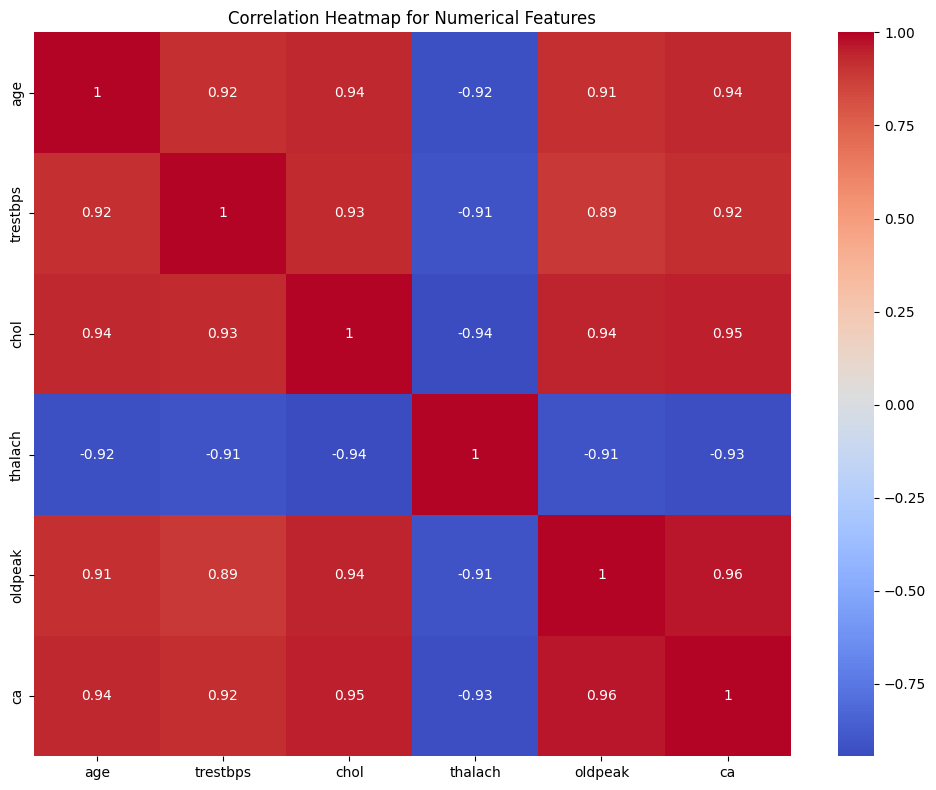

In [200]:
plt.figure(figsize=(10,8))
sns.heatmap(df.select_dtypes(include=np.number).corr(), cmap="coolwarm", annot=True)
plt.title("Correlation Heatmap for Numerical Features")
plt.tight_layout()
plt.savefig("correlation_heatmap.png")
plt.show()

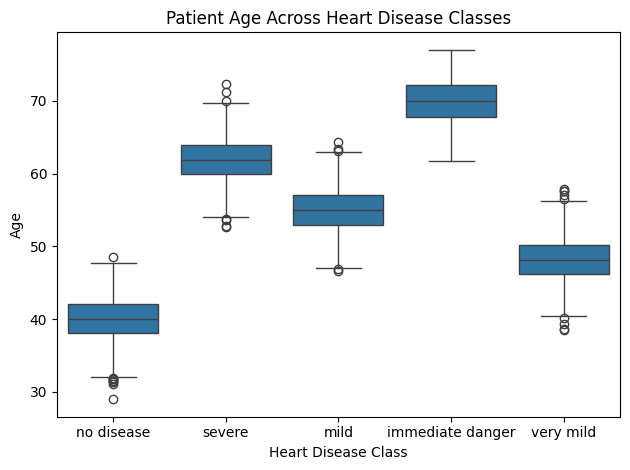

In [201]:
plt.figure()
sns.boxplot(x=target, y="age", data=df)
plt.title("Patient Age Across Heart Disease Classes")
plt.xlabel("Heart Disease Class")
plt.ylabel("Age")
plt.tight_layout()
plt.savefig("boxplot_age.png")
plt.show()

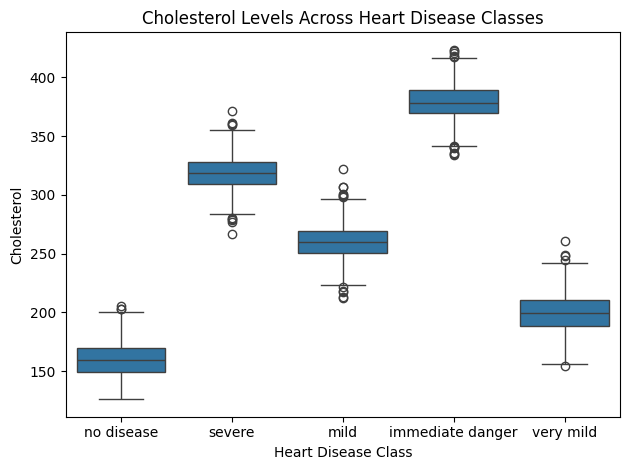

In [202]:
plt.figure()
sns.boxplot(x=target, y="chol", data=df)
plt.title("Cholesterol Levels Across Heart Disease Classes")
plt.xlabel("Heart Disease Class")
plt.ylabel("Cholesterol")
plt.tight_layout()
plt.savefig("boxplot_chol.png")
plt.show()

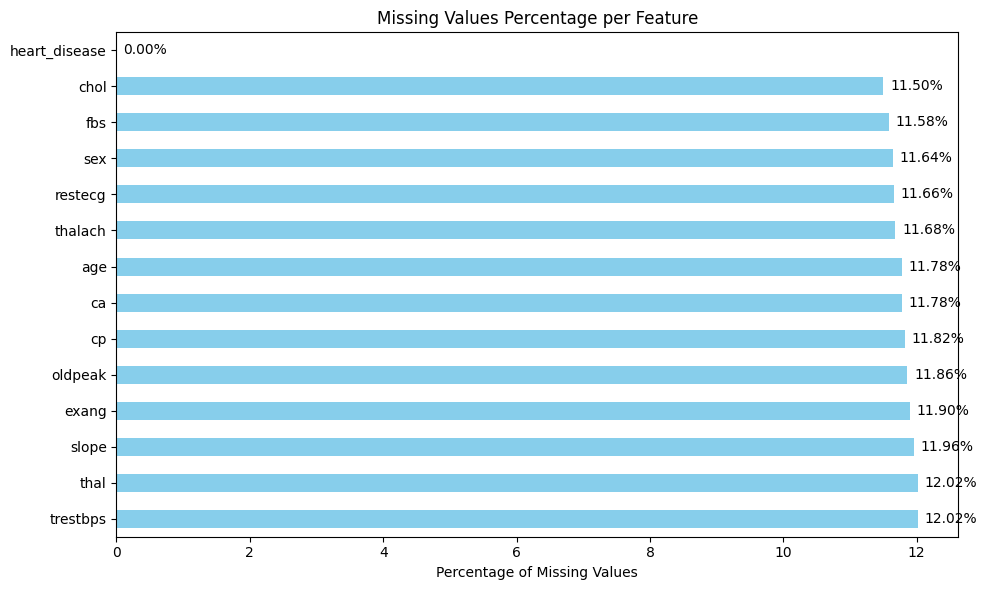

In [203]:
missing_percent = df.isnull().mean() * 100

plt.figure(figsize=(10,6))

if missing_percent.max() == 0:
    plt.text(0.5, 0.5, "No Missing Values Found", ha='center', va='center', fontsize=14)
    plt.title("Missing Values Percentage per Feature")
    plt.axis('off')
else:
    missing_percent.sort_values(ascending=False).plot(kind="barh", color='skyblue')
    plt.xlabel("Percentage of Missing Values")
    plt.title("Missing Values Percentage per Feature")
    for i, v in enumerate(missing_percent.sort_values(ascending=False)):
        plt.text(v + 0.1, i, f"{v:.2f}%", va='center')

plt.tight_layout()
plt.savefig("missing_values.png")
plt.show()


PART 3: TRAIN-TEST SPLIT & DATA PREPROCESSING

In [204]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [205]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [206]:
X_train.shape[0], X_test.shape[0]

(4000, 1000)

In [207]:
y_train.value_counts(), y_test.value_counts()

(heart_disease
 no disease          824
 mild                823
 immediate danger    795
 severe              779
 very mild           779
 Name: count, dtype: int64,
 heart_disease
 no disease          206
 mild                205
 immediate danger    199
 severe              195
 very mild           195
 Name: count, dtype: int64)

In [208]:
numerical_features = X.select_dtypes(include=np.number).columns
categorical_features = X.select_dtypes(exclude=np.number).columns
numerical_features, categorical_features

(Index(['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca'], dtype='object'),
 Index(['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal'], dtype='object'))

In [209]:
len(categorical_features)

7

In [210]:
numeric_imputer = SimpleImputer(strategy="median")
categorical_imputer = SimpleImputer(strategy="most_frequent")

In [211]:
preprocessor = ColumnTransformer([
    ("num", numeric_imputer, numerical_features),
    ("cat", Pipeline([
        ("imputer", categorical_imputer),
        ("encoder", OneHotEncoder(handle_unknown="ignore"))
    ]), categorical_features)
])

In [212]:
X_train_transformed = preprocessor.fit_transform(X_train)
np.isnan(X_train_transformed).sum()

np.int64(0)

In [213]:
np.issubdtype(X_train_transformed.dtype, np.number)

True

PART 4: MODEL TRAINING & EVALUATION WITH HYPERPARAMETER TUNING

In [214]:
models = {
    "RandomForest": (RandomForestClassifier(random_state=42), {
        "classifier__n_estimators": [100, 200],
        "classifier__max_depth": [None, 10]
    }),
    "SVM": (SVC(), {
        "classifier__C": [1, 10],
        "classifier__kernel": ["rbf"]
    }),
    "KNN": (KNeighborsClassifier(), {
        "classifier__n_neighbors": [5, 7]
    }),
    "MLP": (MLPClassifier(max_iter=500, random_state=42), {
        "classifier__hidden_layer_sizes": [(50,), (100,)]
    }),
    "GradientBoosting": (GradientBoostingClassifier(random_state=42), {
        "classifier__n_estimators": [100, 200]
    })
}

In [215]:
results = []
best_models = {}

In [216]:
for name, (model, params) in models.items():
    pipeline = Pipeline([
        ("preprocess", preprocessor),
        ("classifier", model)
    ])
    start = time.time()
    grid = GridSearchCV(pipeline, params, cv=5, scoring="accuracy")
    grid.fit(X_train, y_train)
    train_time = time.time() - start
    y_pred = grid.best_estimator_.predict(X_test)
    test_acc = accuracy_score(y_test, y_pred)
    train_acc = grid.best_score_
    gap = train_acc - test_acc
    fit_status = "BestFit" if abs(gap) < 0.05 else ("Overfit" if gap > 0.05 else "Underfit")
    results.append([name, train_acc, test_acc, gap, fit_status, train_time, grid.best_params_])
    best_models[name] = grid.best_estimator_

MODEL COMPARISON & SELECTION

In [217]:
comparison_df = pd.DataFrame(results, columns=[
    "Model", "Best CV Accuracy", "Test Accuracy",
    "Overfitting Gap", "Status", "Train Time", "Best Params"
])
train_accuracies = []
for name, model in best_models.items():
    train_acc = model.score(X_train, y_train)
    train_accuracies.append(train_acc)
comparison_df["Train Accuracy"] = train_accuracies
comparison_df = comparison_df[[
    "Model", "Best CV Accuracy", "Train Accuracy",
    "Test Accuracy", "Overfitting Gap", "Status"
]]

comparison_df

def classify_fit(gap):
    if gap > 0.05:
        return "Overfit"
    elif gap < -0.05:
        return "Underfit"
    else:
        return "Best Fit"

comparison_df["Status"] = comparison_df["Overfitting Gap"].apply(classify_fit)
comparison_df



,Model,Best CV Accuracy,Train Accuracy,Test Accuracy,Overfitting Gap,Status
0,RandomForest,0.99950,1.00000,0.999,0.00050,Best Fit
1,SVM,0.95775,0.96125,0.957,0.00075,Best Fit
2,KNN,0.97175,0.97675,0.979,-0.00725,Best Fit
3,MLP,0.98875,0.97875,0.969,0.01975,Best Fit
4,GradientBoosting,0.99950,1.00000,0.999,0.00050,Best Fit


In [218]:
comparison_df_sorted = comparison_df.sort_values(by="Test Accuracy", ascending=False)
comparison_df_sorted

,Model,Best CV Accuracy,Train Accuracy,Test Accuracy,Overfitting Gap,Status
0,RandomForest,0.99950,1.00000,0.999,0.00050,Best Fit
4,GradientBoosting,0.99950,1.00000,0.999,0.00050,Best Fit
2,KNN,0.97175,0.97675,0.979,-0.00725,Best Fit
3,MLP,0.98875,0.97875,0.969,0.01975,Best Fit
1,SVM,0.95775,0.96125,0.957,0.00075,Best Fit


In [219]:
best_model_row = comparison_df_sorted.iloc[0]
print("Best Model:", best_model_row["Model"])
print("Test Accuracy:", best_model_row["Test Accuracy"])

Best Model: RandomForest
Test Accuracy: 0.999


In [220]:
best_model_name = best_model_row["Model"]
best_model = best_models[best_model_name]

In [221]:
y_pred_best = best_model.predict(X_test)

report = classification_report(y_test, y_pred_best, output_dict=True)
df_report = pd.DataFrame(report).T
print(df_report)

                  precision    recall  f1-score   support
immediate danger   1.000000  0.994975  0.997481   199.000
mild               1.000000  1.000000  1.000000   205.000
no disease         1.000000  1.000000  1.000000   206.000
severe             0.994898  1.000000  0.997442   195.000
very mild          1.000000  1.000000  1.000000   195.000
accuracy           0.999000  0.999000  0.999000     0.999
macro avg          0.998980  0.998995  0.998985  1000.000
weighted avg       0.999005  0.999000  0.999000  1000.000


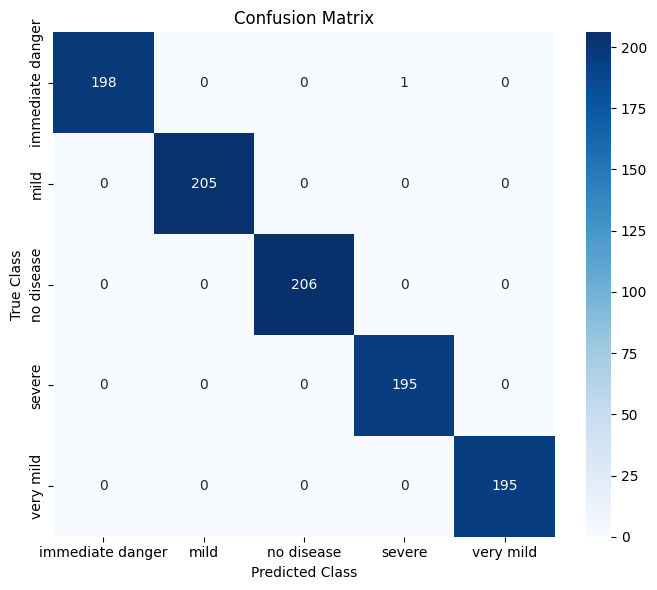

In [222]:
cm = confusion_matrix(y_test, y_pred_best)
class_names = ["immediate danger", "mild", "no disease", "severe", "very mild"]

plt.figure(figsize=(7,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.savefig("confusion_matrix.png")
plt.show()

In [223]:
pd.DataFrame(classification_report(y_test, y_pred_best, output_dict=True)).T

,precision,recall,f1-score,support
immediate danger,1.000000,0.994975,0.997481,199.000
mild,1.000000,1.000000,1.000000,205.000
no disease,1.000000,1.000000,1.000000,206.000
severe,0.994898,1.000000,0.997442,195.000
very mild,1.000000,1.000000,1.000000,195.000
accuracy,0.999000,0.999000,0.999000,0.999
macro avg,0.998980,0.998995,0.998985,1000.000
weighted avg,0.999005,0.999000,0.999000,1000.000


                   Feature  Importance
4                  oldpeak    0.155279
5                       ca    0.117872
10     cp_Non-Anginal Pain    0.106624
2                     chol    0.080353
23             thal_Normal    0.072332
9       cp_Atypical Angina    0.058248
11       cp_Typical Angina    0.057411
24  thal_Reversible defect    0.057205
22       thal_Fixed defect    0.048458
21         slope_Upsloping    0.033489


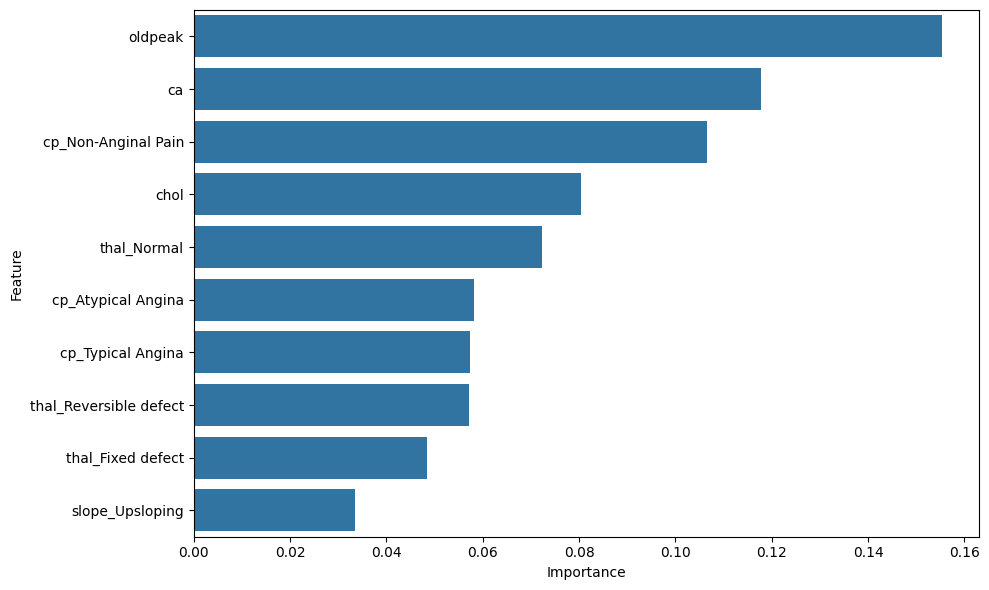

In [224]:
if hasattr(best_model.named_steps["classifier"], "feature_importances_"):
    importances = best_model.named_steps["classifier"].feature_importances_
    feature_names = []
    feature_names.extend(numerical_features)
    if len(categorical_features) > 0:
        ohe = best_model.named_steps["preprocess"].named_transformers_["cat"].named_steps["encoder"]
        ohe_features = ohe.get_feature_names_out(categorical_features)
        feature_names.extend(ohe_features)
    feat_df = pd.DataFrame({
        "Feature": feature_names,
        "Importance": importances
    }).sort_values(by="Importance", ascending=False)
    print(feat_df.head(10))
    plt.figure(figsize=(10,6))
    sns.barplot(y="Feature", x="Importance", data=feat_df.head(10))
    plt.tight_layout()
    plt.savefig("feature_importances.png")
    plt.show()
else:
    print("The best model does not support feature importance.")


PART 5: MODEL PERSISTENCE

In [225]:
os.makedirs("deployment", exist_ok=True)
joblib.dump(best_model, "deployment/best_heart_disease_model.pkl")

with open("deployment/feature_columns.txt", "w") as f:
    for col in X.columns:
        f.write(col + "\n")

class_names = sorted(y.unique())
with open("deployment/class_names.txt", "w") as f:
    for cls in class_names:
        f.write(cls + "\n")


In [226]:
loaded_model = joblib.load("deployment/best_heart_disease_model.pkl")

with open("deployment/feature_columns.txt") as f:
    features = [line.strip() for line in f]

with open("deployment/class_names.txt") as f:
    classes = [line.strip() for line in f]

In [227]:
random_samples = X_test.sample(5, random_state=42)
random_samples_df = random_samples.copy()
random_samples_df["Predicted_Class"] = loaded_model.predict(random_samples_df)
random_samples_df["Actual_Class"] = y_test.loc[random_samples_df.index].values
random_samples_df


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,Predicted_Class,Actual_Class
2915,55.412874,NaN,Non-Anginal Pain,133.486056,247.979109,True,LV hypertrophy,140.527901,Yes,1.294529,Flat,NaN,Reversible defect,mild,mild
3145,55.511016,Male,Non-Anginal Pain,NaN,267.420397,NaN,LV hypertrophy,141.948417,Yes,0.925632,Flat,1.0,Reversible defect,mild,mild
4389,55.043169,Male,Non-Anginal Pain,137.938602,258.363876,False,Normal,144.986961,Yes,1.122169,NaN,1.0,Reversible defect,mild,mild
2617,39.345300,Male,Typical Angina,112.662980,166.300191,NaN,ST-T abnormality,181.598821,No,0.176658,Upsloping,NaN,Normal,no disease,no disease
4614,58.183271,Female,Non-Anginal Pain,138.572342,NaN,True,LV hypertrophy,148.333590,Yes,0.926518,NaN,1.0,Reversible defect,mild,mild


In [228]:
new_patients = pd.DataFrame([
    [55, 1, 130, 250, 0, 1, 0, 140, 1, 1, 0, 0, 1],
    [42, 0, 120, 220, 1, 0, 1, 160, 0, 1, 1, 0, 0]
], columns=features)

pred_classes = loaded_model.predict(new_patients)
pred_probs = loaded_model.predict_proba(new_patients)

results_df = new_patients.copy()
results_df["Predicted_Class"] = pred_classes

for i, cls in enumerate(classes):
    results_df[f"Prob_{cls}"] = pred_probs[:, i]

results_df


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,Predicted_Class,Prob_immediate danger,Prob_mild,Prob_no disease,Prob_severe,Prob_very mild
0,55,1,130,250,0,1,0,140,1,1,0,0,1,no disease,0.03,0.10,0.51,0.09,0.27
1,42,0,120,220,1,0,1,160,0,1,1,0,0,no disease,0.03,0.06,0.54,0.06,0.31
